In [23]:
df.shape

(36275, 19)

In [25]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [41]:
df['reservation_status_date'] = pd.to_datetime(
    df['arrival_year'].astype(str) + '-' +
    df['arrival_month'].astype(str) + '-' +
    df['arrival_date'].astype(str),
    errors='coerce'  # 유효하지 않은 날짜는 NaT로 처리
)


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            36275 non-null  object        
 1   no_of_adults                          36275 non-null  int64         
 2   no_of_children                        36275 non-null  int64         
 3   no_of_weekend_nights                  36275 non-null  int64         
 4   no_of_week_nights                     36275 non-null  int64         
 5   type_of_meal_plan                     36275 non-null  object        
 6   required_car_parking_space            36275 non-null  int64         
 7   room_type_reserved                    36275 non-null  object        
 8   lead_time                             36275 non-null  int64         
 9   arrival_year                          36275 non-null  int64         
 10

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            36275 non-null  object        
 1   no_of_adults                          36275 non-null  int64         
 2   no_of_children                        36275 non-null  int64         
 3   no_of_weekend_nights                  36275 non-null  int64         
 4   no_of_week_nights                     36275 non-null  int64         
 5   type_of_meal_plan                     36275 non-null  object        
 6   required_car_parking_space            36275 non-null  int64         
 7   room_type_reserved                    36275 non-null  object        
 8   lead_time                             36275 non-null  int64         
 9   arrival_year                          36275 non-null  int64         
 10

In [47]:
df.describe(include = 'object')

,Booking_ID,type_of_meal_plan,room_type_reserved,market_segment_type,booking_status
count,36275,36275,36275,36275,36275
unique,36275,4,7,5,2
top,INN00001,Meal Plan 1,Room_Type 1,Online,Not_Canceled
freq,1,27835,28130,23214,24390


In [49]:
for col in df.describe(include='object').columns:
    print(col)
    print(df[col].unique())
    print('-'*50)

Booking_ID
['INN00001' 'INN00002' 'INN00003' ... 'INN36273' 'INN36274' 'INN36275']
--------------------------------------------------
type_of_meal_plan
['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
--------------------------------------------------
room_type_reserved
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
--------------------------------------------------
market_segment_type
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
--------------------------------------------------
booking_status
['Not_Canceled' 'Canceled']
--------------------------------------------------


# <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
<p style="background-color:#FF8C00;font-family:Arial, sans-serif;color:#FFFFFF;font-size:150%;text-align:left;border-radius:10px;padding:10px;"> 4) Data Pre-processing 🛠️ </p>


## Handling Missing Values

In [59]:
df.drop(columns=[col for col in ['company', 'agent'] if col in df.columns], inplace=True)
df.isnull().sum()

Booking_ID                               0
no_of_adults                             0
no_of_children                           0
no_of_weekend_nights                     0
no_of_week_nights                        0
type_of_meal_plan                        0
required_car_parking_space               0
room_type_reserved                       0
lead_time                                0
arrival_year                             0
arrival_month                            0
arrival_date                             0
market_segment_type                      0
repeated_guest                           0
no_of_previous_cancellations             0
no_of_previous_bookings_not_canceled     0
avg_price_per_room                       0
no_of_special_requests                   0
booking_status                           0
reservation_status_date                 37
dtype: int64

In [61]:
df.drop(columns=[col for col in ['company', 'agent'] if col in df.columns], inplace=True)


In [63]:
df.isnull().sum()

Booking_ID                               0
no_of_adults                             0
no_of_children                           0
no_of_weekend_nights                     0
no_of_week_nights                        0
type_of_meal_plan                        0
required_car_parking_space               0
room_type_reserved                       0
lead_time                                0
arrival_year                             0
arrival_month                            0
arrival_date                             0
market_segment_type                      0
repeated_guest                           0
no_of_previous_cancellations             0
no_of_previous_bookings_not_canceled     0
avg_price_per_room                       0
no_of_special_requests                   0
booking_status                           0
reservation_status_date                 37
dtype: int64

In [65]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,reservation_status_date
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36238
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655,2018-05-24 16:37:29.130746624
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017-07-01 00:00:00
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000,2018-02-28 00:00:00
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000,2018-06-12 00:00:00
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000,2018-09-19 00:00:00
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000,2018-12-31 00:00:00
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236,NaN


In [69]:
# 객실 평균 단가가 너무 큰 이상치 제거
df = df[df['avg_price_per_room'] < 5000]


In [18]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


# <a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
  <p style="background-color:#FF8C00;font-family:Arial, sans-serif;color:#FFFFFF;font-size:150%;text-align:left;border-radius:10px;padding:10px;"> 5) Data Analysis and Visualization 🛠️ </p>
</div>


📈 Decision Tree 성능 비교표
           Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Decision Tree  0.821606   0.765625  0.647209  0.701455  0.871689


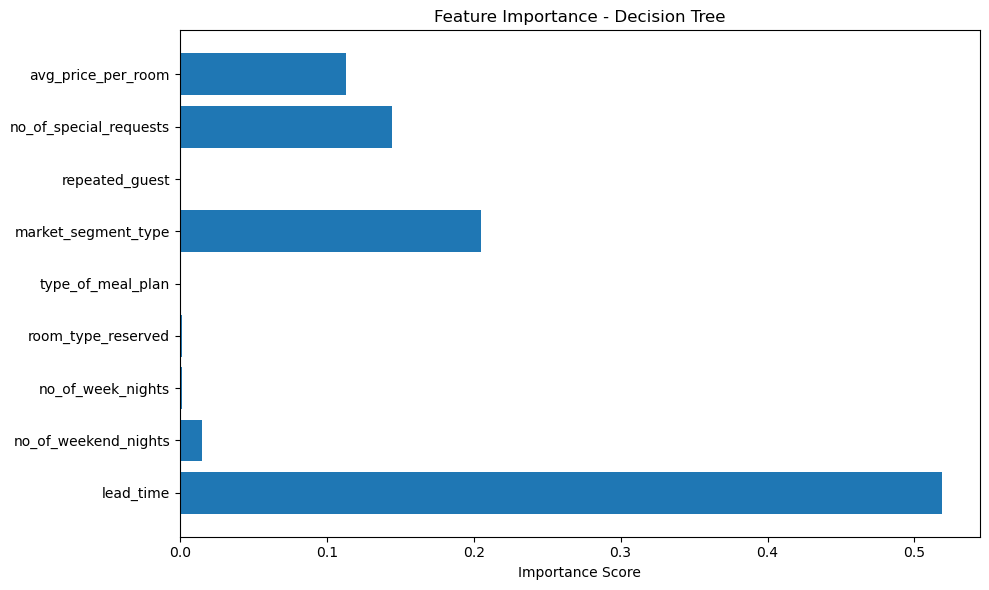

In [82]:
# 디시젼 트리
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, roc_auc_score

# 데이터 준비
df = df[df['avg_price_per_room'] < 5000]
df.drop(['company', 'agent'], axis=1, inplace=True, errors='ignore')
df.dropna(inplace=True)

# Feature 및 Target 설정
features = [
    'lead_time', 'no_of_weekend_nights', 'no_of_week_nights',
    'room_type_reserved', 'type_of_meal_plan',
    'market_segment_type', 'repeated_guest',
    'no_of_special_requests', 'avg_price_per_room'
]
X = df[features].copy()
y = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

# 범주형 변수 인코딩
for col in X.select_dtypes('object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# 학습/테스트 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 모델 정의 및 학습
dt_model = DecisionTreeClassifier(random_state=42, max_depth=5)
dt_model.fit(X_train, y_train)

# 예측
preds = dt_model.predict(X_test)
proba = dt_model.predict_proba(X_test)[:, 1]

# 성능 평가
report = classification_report(y_test, preds, output_dict=True)
auc = roc_auc_score(y_test, proba)

# 📊 성능 비교표 출력
performance_dt = pd.DataFrame([{
    "Model": "Decision Tree",
    "Accuracy": report["accuracy"],
    "Precision": report["1"]["precision"],
    "Recall": report["1"]["recall"],
    "F1-Score": report["1"]["f1-score"],
    "ROC AUC": auc
}])
print("📈 Decision Tree 성능 비교표")
print(performance_dt)

# 🌟 Feature Importance 시각화
importances = dt_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance - Decision Tree")
plt.tight_layout()
plt.show()


📈 Random Forest 성능 비교표
           Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  Random Forest  0.883554   0.851332  0.775884  0.811859  0.936723


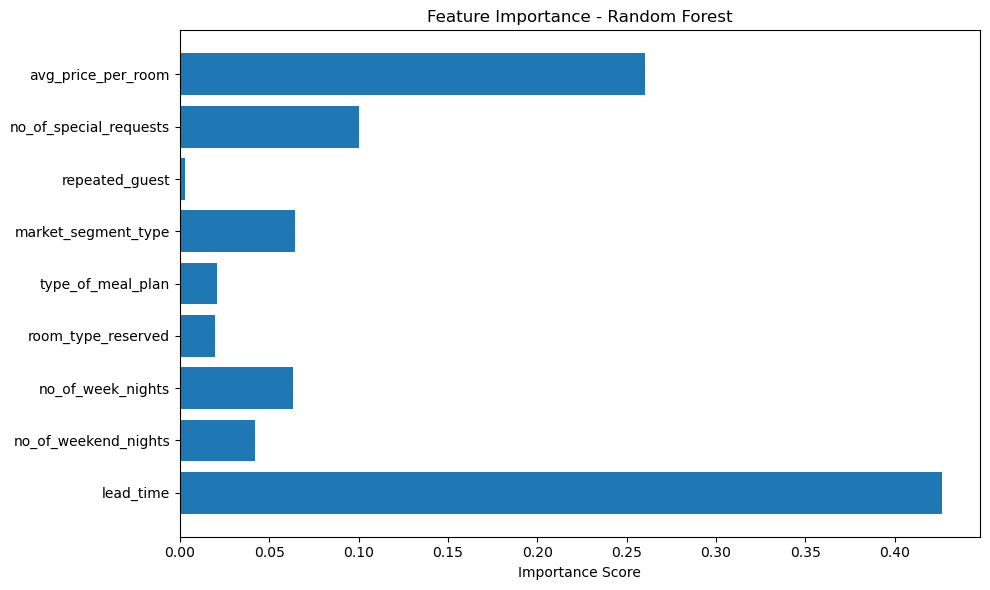

In [86]:
# 랜덤 포레스트
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# 1. 데이터 준비
df = df[df['avg_price_per_room'] < 5000]
df.drop(['company', 'agent'], axis=1, inplace=True, errors='ignore')
df.dropna(inplace=True)

# 2. 변수 선택
features = [
    'lead_time', 'no_of_weekend_nights', 'no_of_week_nights',
    'room_type_reserved', 'type_of_meal_plan',
    'market_segment_type', 'repeated_guest',
    'no_of_special_requests', 'avg_price_per_room'
]
X = df[features].copy()
y = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

# 범주형 변수 인코딩
for col in X.select_dtypes('object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# 학습/검증 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. 모델 학습
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# 4. 예측
rf_preds = rf_model.predict(X_test)
rf_proba = rf_model.predict_proba(X_test)[:, 1]

# 5. 성능 평가
rf_report = classification_report(y_test, rf_preds, output_dict=True)
rf_auc = roc_auc_score(y_test, rf_proba)

# 📊 성능 비교표 출력
performance_rf = pd.DataFrame([{
    "Model": "Random Forest",
    "Accuracy": rf_report["accuracy"],
    "Precision": rf_report["1"]["precision"],
    "Recall": rf_report["1"]["recall"],
    "F1-Score": rf_report["1"]["f1-score"],
    "ROC AUC": rf_auc
}])
print("📈 Random Forest 성능 비교표")
print(performance_rf)

# 🌟 Feature Importance 시각화
rf_importance = rf_model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, rf_importance)
plt.xlabel("Importance Score")
plt.title("Feature Importance - Random Forest")
plt.tight_layout()
plt.show()



📈 XGBoost 성능 비교표
     Model  Accuracy  Precision    Recall  F1-Score   ROC AUC
0  XGBoost   0.87707   0.850337  0.752876  0.798644  0.933175


<Figure size 1000x600 with 0 Axes>

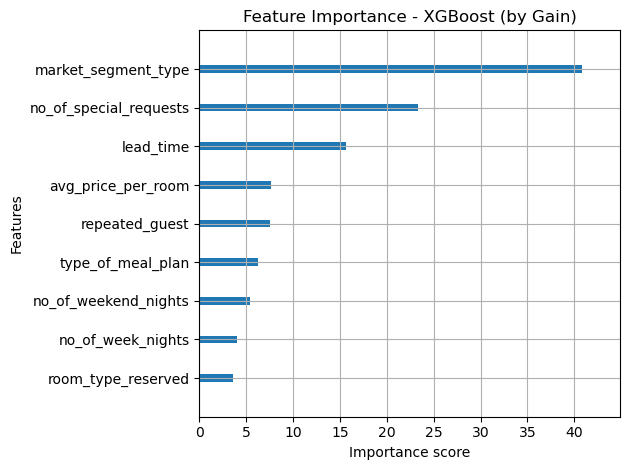

In [88]:
# xgboost
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier, plot_importance
from sklearn.metrics import classification_report, roc_auc_score

# 1. 데이터 전처리
df = df[df['avg_price_per_room'] < 5000]
df.drop(['company', 'agent'], axis=1, inplace=True, errors='ignore')
df.dropna(inplace=True)

# 2. 변수 선택
features = [
    'lead_time', 'no_of_weekend_nights', 'no_of_week_nights',
    'room_type_reserved', 'type_of_meal_plan',
    'market_segment_type', 'repeated_guest',
    'no_of_special_requests', 'avg_price_per_room'
]
X = df[features].copy()
y = df['booking_status'].apply(lambda x: 1 if x == 'Canceled' else 0)

# 3. 범주형 변수 인코딩
for col in X.select_dtypes('object').columns:
    X[col] = LabelEncoder().fit_transform(X[col])

# 4. 학습/테스트 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. XGBoost 모델 학습
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# 6. 예측 및 평가
xgb_preds = xgb_model.predict(X_test)
xgb_proba = xgb_model.predict_proba(X_test)[:, 1]

xgb_report = classification_report(y_test, xgb_preds, output_dict=True)
xgb_auc = roc_auc_score(y_test, xgb_proba)

# 📊 성능 비교표 출력
performance_xgb = pd.DataFrame([{
    "Model": "XGBoost",
    "Accuracy": xgb_report["accuracy"],
    "Precision": xgb_report["1"]["precision"],
    "Recall": xgb_report["1"]["recall"],
    "F1-Score": xgb_report["1"]["f1-score"],
    "ROC AUC": xgb_auc
}])
print("📈 XGBoost 성능 비교표")
print(performance_xgb)

# 🌟 Feature Importance 시각화
plt.figure(figsize=(10, 6))
plot_importance(xgb_model, importance_type='gain', show_values=False)
plt.title("Feature Importance - XGBoost (by Gain)")
plt.tight_layout()
plt.show()


><p style="font-family:Arial, sans-serif;font-size:20px;color:#white;">The provided bar graph illustrates the cancellation and non-cancellation percentages for reservations. It is evident that a substantial portion of reservations remains unaffected by cancellations. Notably, 37% of clients have chosen to cancel their reservations, and this has a noteworthy impact on the hotels' revenue.</p>

><p style="font-family:Arial, sans-serif;font-size:20px;color:#white;">We've created a grouped bar graph to examine the months with the highest and lowest reservation levels based on their status. It's evident that the month of August stands out, having the highest numbers of both confirmed and canceled reservations. In contrast, January has the fewest confirmed reservations but the highest number of canceled reservations.</p>

><p style="font-family:Arial, sans-serif;font-size:20px;color:#white;">This bar graph illustrates that cancellations are most frequent when prices are at their highest and least common when prices are at their lowest. Consequently, the price of accommodation appears to be the primary factor influencing cancellations.<br>
Now, let's examine which country experiences the highest number of canceled reservations. Portugal stands out as the top country with the highest number of cancellations.
</p>

><p style="font-family:Arial, sans-serif;font-size:20px;color:#white;">Let's analyze the sources from which guests are making hotel reservations, including Direct, Groups, Online Travel Agencies, and Offline Travel Agents. <br>Approximately 46% of clients make reservations through online travel agencies, while 27% come through group bookings. <br>A mere 4% of clients choose to book hotels directly by visiting them in person and making reservations.</p>

In [30]:
df['market_segment'].value_counts()

market_segment
Online TA        56402
Offline TA/TO    24159
Groups           19806
Direct           12448
Corporate         5111
Complementary      734
Aviation           237
Name: count, dtype: int64

In [31]:
df['market_segment'].value_counts(normalize=True)


market_segment
Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: proportion, dtype: float64

In [32]:
cancelled_data['market_segment'].value_counts(normalize=True)

market_segment
Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: proportion, dtype: float64

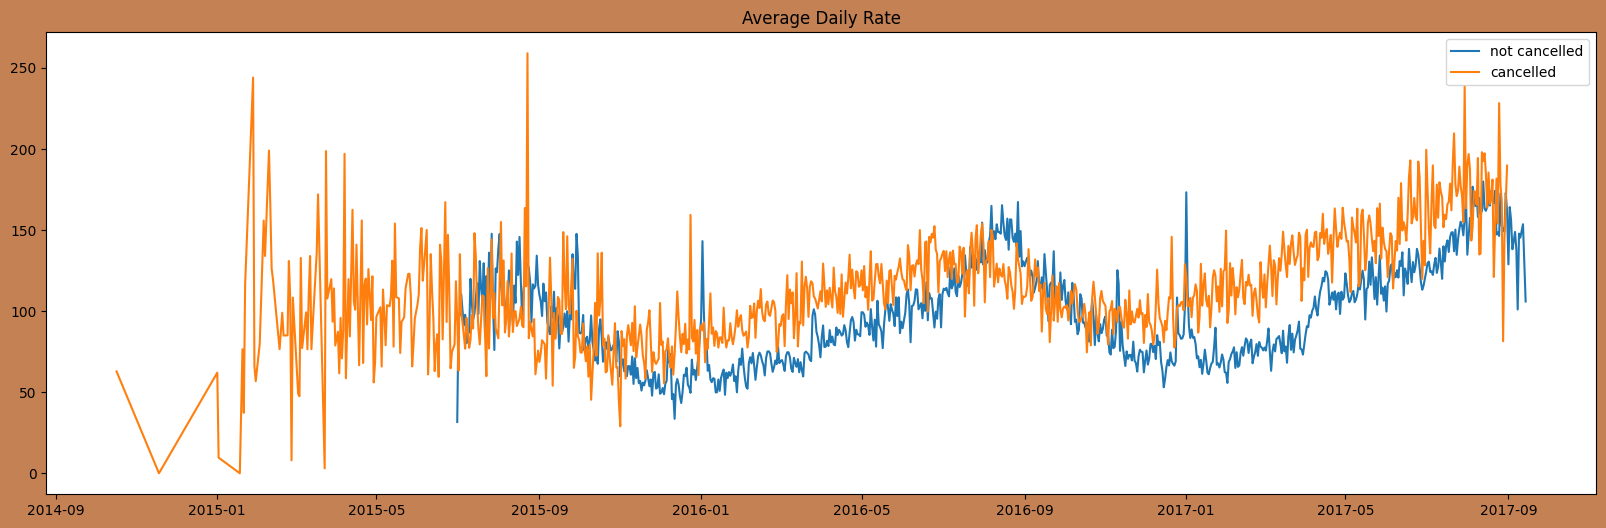

In [33]:
cancelled_df_adr= cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

not_cancelled_data=df[df['is_canceled']==0]
not_cancelled_df_adr= not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

plt.figure(figsize=(20,6), facecolor='#C38154')
plt.title('Average Daily Rate', color="Black")
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend()
plt.show()

In [34]:
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date']>'2016') & (cancelled_df_adr['reservation_status_date']<'2017-09')]

not_cancelled_df_adr = not_cancelled_df_adr[(not_cancelled_df_adr['reservation_status_date']>'2016') & (not_cancelled_df_adr['reservation_status_date']<'2017-09')]

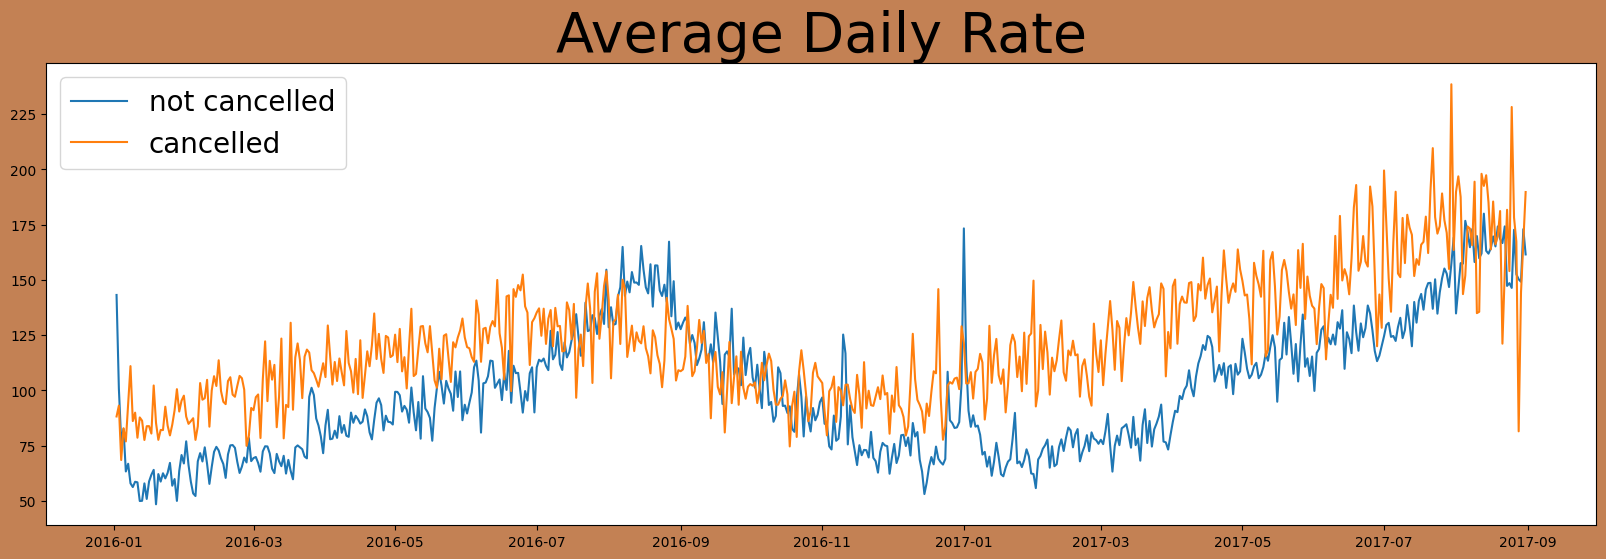

In [35]:
plt.figure(figsize=(20,6), facecolor='#C38154')
plt.title('Average Daily Rate', fontsize = 40)
plt.plot(not_cancelled_df_adr['reservation_status_date'],not_cancelled_df_adr['adr'], label='not cancelled')
plt.plot(cancelled_df_adr['reservation_status_date'],cancelled_df_adr['adr'], label = 'cancelled')
plt.legend(fontsize = 20)
plt.show()

><p style="font-family:Arial, sans-serif;font-size:20px;color:#white;">As seen in the graph, reservations are canceled when the average daily rate is higher than when it is not canceled. <br>It clearly proves all the above analysis that the higher price leads to higher cancellation.</P>

<a id="top"></a>
<div class="list-group" id="list-tab" role="tablist">
  <p
    style="
      background-color: #800080;
      font-family: Arial, sans-serif;
      color: #ffffff;
      font-size: 150%;
      text-align: left;
      border-radius: 10px;
      padding: 10px;
    "
  >
    6) Final Result 🏁
  </p>
</div>

<p style="font-family:Arial, sans-serif;font-size:30px;color:Orange;"><b>Suggestions:</b></p>
 
<a id='top'></a>
<ol style="font-family:Arial, sans-serif;font-size:20px;color:#white;">
  <li>Increasing prices are associated with a higher rate of cancellations. To mitigate reservation cancellations, hotels could refine their pricing strategies by offering reduced rates for specific locations and providing discounts to customers.</li>
  <li>The resort hotel experiences a higher ratio of cancellations compared to the city hotels. Therefore, hotels should consider offering competitive room price discounts on weekends and holidays.</li>
  <li>During the month of January, hotels can launch marketing campaigns with attractive offers to boost their revenue, especially since cancellations tend to peak during this period.</li>
  <li>Enhancing the quality of hotels and their services, particularly in Portugal, can be an effective approach.


<div style="background-color:#87CEEB; padding:20px; border-radius:10px;">
  <h2 style="color:Green; font-family:Arial, sans-serif; text-align:center;font-size:24px;">Notes 😃😃😃😃</h2>
  <ul style="color:#000000; font-family:Arial, sans-serif; font-size:20px;">
    <li>Thank you for reading my analysis and regression. 😃😃😃😃</li>
    <li>If you have any questions or advice, please write in the comments. ❤️❤️❤️❤️</li>
    <li>If anyone has a model with a higher percentage, please let me know. 🤝🤝🤝</li>
  </ul>
</div>

<div style="background-color:#FFA07A; padding:20px; border-radius:10px;">
  <h2 style="color:#FFFFFF; font-family:Arial, sans-serif; text-align:center;">Vote ❤️😃</h2>
  <p style="color:#000000; font-family:Arial, sans-serif; text-align:center; font-size:20px;"><b>If you enjoyed this analysis, an Upvote would be the cherry on top!</b> 🍒👍</p>
</div>

<div style="background-color:#90EE90; padding:20px; border-radius:10px;">
  <h2 style="color:#FFFFFF; font-family:Arial, sans-serif; text-align:center;font-size:20px;">The End 🤝🎉🤝🎉</h2>
</div>
